In [14]:
import torch.nn as nn

In [15]:
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np

In [16]:
#download MNIST
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)
#create minibatches 
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

In [17]:
epoch=[1,4,6,9,11,15,18,20,22,24,27,29,31]
#training set
acc=[]
for k in epoch:
  w1=torch.randn(784,5)/np.sqrt(784)
  w1.requires_grad_()
  b1=torch.zeros(5, requires_grad=True)
  w2=torch.randn(5,10)/np.sqrt(5)
  w2.requires_grad_()
  b2=torch.zeros(10,requires_grad=True) 
  optimizer = torch.optim.SGD([w1,b1,w2,b2], lr=0.1)
  for t in range(k):
    for images, labels in train_loader:
        x = images.view(-1, 28*28)
        optimizer.zero_grad()
        z=torch.zeros(100,10)
        y=torch.matmul(x,w1) + b1
        y_relu = F.relu(y)
        z=torch.matmul(y_relu,w2)
        z1=z+b2
        cross_entropy = F.cross_entropy(z1, labels)
        cross_entropy.backward(retain_graph=True)
        optimizer.step()
  #test set
  correct = 0
  total = len(mnist_test)
  with torch.no_grad():
    for images, labels in test_loader:
        x = images.view(-1, 28*28)
        zk=torch.zeros(100,10)
        y=torch.matmul(x,w1) + b1
        y_relu = F.relu(y)
        zk=torch.matmul(y_relu,w2)
        z1=zk+b2
        predictions = torch.argmax(z1, dim=1)
        correct += torch.sum((predictions == labels).float())
  acc.append(correct/total)
  print("For",k,"epoch accuracy =",correct/total)

For 1 epoch accuracy = tensor(0.8419)
For 4 epoch accuracy = tensor(0.8733)
For 6 epoch accuracy = tensor(0.8840)
For 9 epoch accuracy = tensor(0.8903)
For 11 epoch accuracy = tensor(0.8899)
For 15 epoch accuracy = tensor(0.8926)
For 18 epoch accuracy = tensor(0.8912)
For 20 epoch accuracy = tensor(0.9020)
For 22 epoch accuracy = tensor(0.8908)
For 24 epoch accuracy = tensor(0.8927)
For 27 epoch accuracy = tensor(0.8907)
For 29 epoch accuracy = tensor(0.8964)
For 31 epoch accuracy = tensor(0.8886)


In [18]:
epoch=np.array(epoch)
acc=np.array(acc)
print(acc)

[0.8419 0.8733 0.884  0.8903 0.8899 0.8926 0.8912 0.902  0.8908 0.8927
 0.8907 0.8964 0.8886]


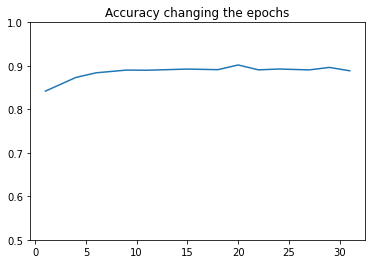

In [19]:
from matplotlib import pyplot
pyplot.plot(epoch,acc)
pyplot.ylim(0.5,1)
pyplot.title("Accuracy changing the epochs")
pyplot.show()